### Аналитика в Яндекс.Афише

### Описание данных
Таблица visits (лог сервера с информацией о посещениях сайта):

    Uid — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Start Ts — дата и время начала сессии
    End Ts — дата и время окончания сессии
    Source Id — идентификатор рекламного источника, из которого пришел пользователь

Таблица orders (информация о заказах):

    Uid — уникальный id пользователя, который сделал заказ
    Buy Ts — дата и время заказа
    Revenue — выручка Яндекс.Афиши с этого заказа

Таблица costs (информация о затратах на маркетинг):

    source_id — идентификатор рекламного источника
    dt — дата
    costs — затраты на этот рекламный источник в этот день

### Шаг 1. Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
visits_df = pd.read_csv('/datasets/visits_log.csv')

In [3]:
orders_df = pd.read_csv('/datasets/orders_log.csv', parse_dates=['Buy Ts'])

In [4]:
costs_df = pd.read_csv('/datasets/costs.csv', parse_dates=['dt'])

In [5]:
def df_info(df):
    """ вывод базовой информации по датафрейму """
    df.info()
    display(df.describe())
    display(df)

In [6]:
df_info(visits_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Source Id,Uid
count,359400.00,359400.00
mean,3.75,9202556994354921472.00
std,1.92,5298432824659611648.00
min,1.00,11863502262781.00
25%,3.00,4613406732167550976.00
50%,4.00,9227412908740601856.00
75%,5.00,13728237011236173824.00
max,10.00,18446676030785673216.00


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [7]:
df_info(orders_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,Revenue,Uid
count,50415.00,50415.00
mean,5.00,9098160634289729536.00
std,21.82,5285741550834715648.00
min,0.00,313578113262317.00
25%,1.22,4533566627250599936.00
50%,2.50,9102273602618561536.00
75%,4.89,13682901980465401856.00
max,2633.28,18446167067214817280.00


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [8]:
df_info(costs_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


,source_id,costs
count,2542.00,2542.00
mean,4.86,129.48
std,3.18,156.30
min,1.00,0.54
25%,2.00,21.95
50%,4.00,77.30
75%,9.00,170.06
max,10.00,1788.28


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


Переименуем названия столбцов

In [9]:
visits_df = visits_df.rename(columns={'Device':'device',
                            'End Ts':'end_ts',
                            'Source Id':'source_id',
                            'Start Ts':'start_ts',
                            'Uid':'uid'})

In [10]:
orders_df = orders_df.rename(columns={'Buy Ts':'buy_ts',
                            'Revenue':'revenue',
                                  'Uid':'uid'})

In [11]:
visits_df.duplicated().sum() # проверяем на дубликаты

0

In [12]:
orders_df.duplicated().sum()# проверяем на дубликаты

0

In [13]:
costs_df.duplicated().sum()# проверяем на дубликаты

0

In [14]:
visits_df['start_ts'] = pd.to_datetime(visits_df['start_ts'], format="%Y-%m-%d %H:%M")# меняем тип данных
visits_df['end_ts'] = pd.to_datetime(visits_df['end_ts'], format="%Y-%m-%d %H:%M")

In [15]:
visits_df['year'] = visits_df['start_ts'].dt.year # добавляем столбец год
visits_df['month'] = visits_df['start_ts'].astype('datetime64[M]')# добавляем столбец месяц
visits_df['week'] = visits_df['start_ts'].astype('datetime64[W]')# добавляем столбец неделя
visits_df['date'] = visits_df['start_ts'].astype('datetime64[D]')# добавляем столбец дата

In [16]:
visits_df

,device,end_ts,source_id,start_ts,uid,year,month,week,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,2017-07-01,2017-07-27,2017-07-29
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,2018-01-01,2018-01-25,2018-01-25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,2018-03-01,2018-03-01,2018-03-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,2017-11-01,2017-11-02,2017-11-02


### Вывод
 В датафреймах  visits_df, orders_df в названиях столбцов заглавные буквы. Была произведена замена в названиях столбцов на обычные буквы. Во всех трех фремах нет дубликатов. Во фрейме visits_df произведена предобработка: изменение типа данных, добавлены новые столбцы год, месяц, неделя и дата.

### Шаг 2. Постройте отчёты и посчитайте метрики

#### Сколько людей пользуются в день, неделю, месяц?

Находим количество пользователей по дням, неделям и месяцам.

In [17]:
dau = visits_df.groupby('date').agg(dau = ('uid', 'nunique')).round().reset_index()# находим кол-во пользователей
wau = visits_df.groupby('week').agg(wau = ('uid', 'nunique')).round().reset_index()
mau = visits_df.groupby('month').agg(mau = ('uid', 'nunique')).round().reset_index()

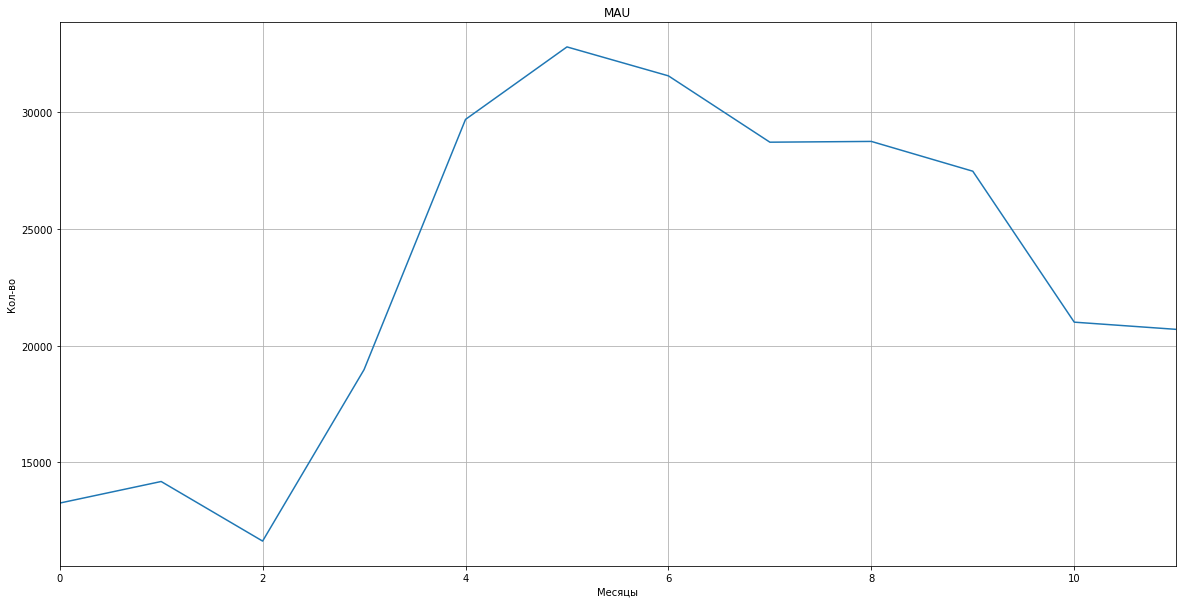

In [18]:
mau['mau'].plot(figsize = (20,10), grid=True)
plt.title('MAU')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во')
plt.show()  

In [19]:
mau_total = visits_df.groupby(['month']).agg(mau_mean = ('uid', 'nunique')).mean().round()

In [20]:
print('Среднее значение MAU:', mau_total)

Среднее значение MAU: mau_mean   23228.00
dtype: float64


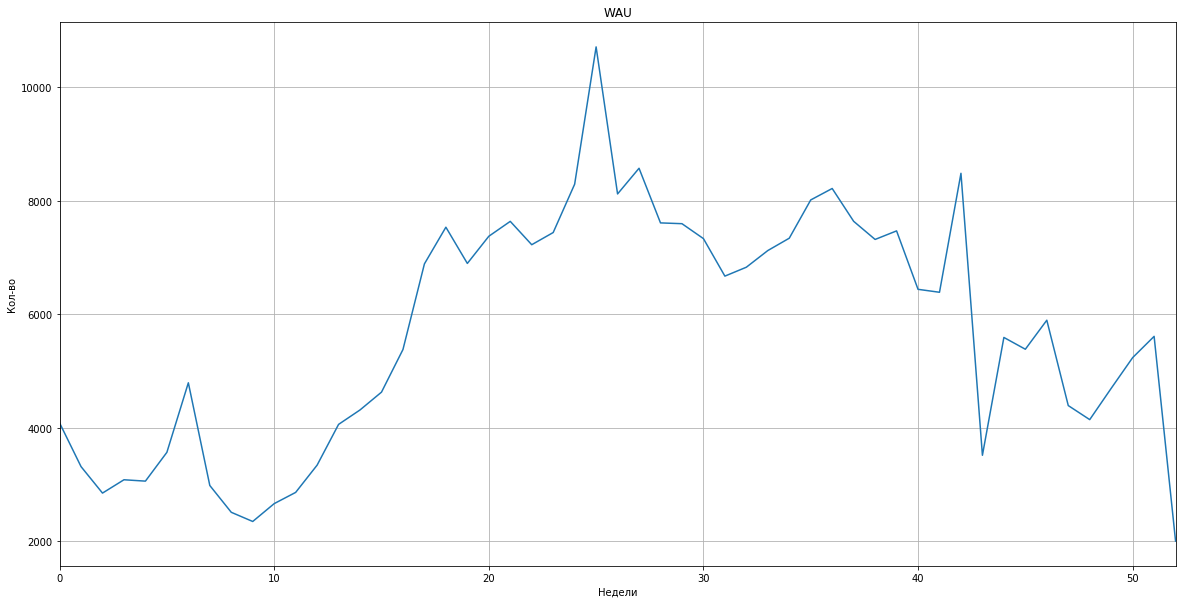

In [21]:
wau['wau'].plot(figsize = (20,10), grid=True)
plt.title('WAU')
plt.xlabel('Недели')
plt.ylabel('Кол-во')
plt.show()  

In [22]:
wau_total = visits_df.groupby(['week']).agg(wau_mean = ('uid', 'nunique')).mean().round()
print('Среднее значение WAU:', wau_total)

Среднее значение WAU: wau_mean   5724.00
dtype: float64


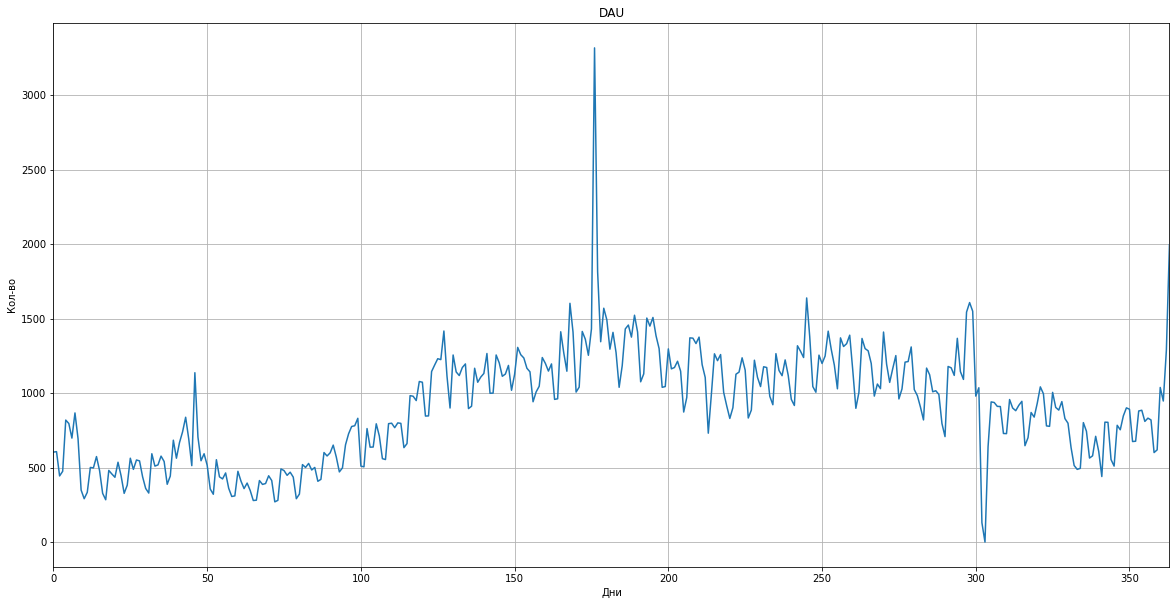

In [23]:
dau['dau'].plot(figsize = (20,10), grid=True)
plt.title('DAU')
plt.xlabel('Дни')
plt.ylabel('Кол-во')
plt.show() 

In [24]:
dau_total = visits_df.groupby('date').agg(dau_mean = ('uid', 'nunique')).mean().round()
print('Среднее значение DAU:', dau_total)

Среднее значение DAU: dau_mean   908.00
dtype: float64


Сервисом Яндекс.Афиша пользуются в среднем: в день - 908 пользователей, в неделю - 5716 пользователей, в месяц - 23228 пользователей. 
    Прослеживается сезонность - с сентября начинается рост с пиком в ноябре, а летом количество пользователей минимально.

#### Сколько сессий в день?

In [25]:
sessions_per_day_per_user = visits_df.groupby('date').agg({'uid': ['count','nunique']})
sessions_per_day_per_user.columns = ['n_sessions', 'n_users']
sessions_per_day_per_user['sessions_per_user'] = (sessions_per_day_per_user['n_sessions'] / sessions_per_day_per_user['n_users'])
print('Среднее количество сессий в день на одного пользователя: {:.2f}'.format(sessions_per_day_per_user['sessions_per_user'].mean()))

Среднее количество сессий в день на одного пользователя: 1.08


Если пользователь заходит на сервис, то одного раза ему достаточно.

#### Сколько длится одна сессия?

In [26]:
visits_df['session_duration_sec'] = (visits_df['end_ts'] - visits_df['start_ts']).dt.seconds

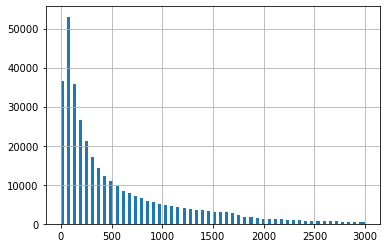

In [27]:
visits_df['session_duration_sec'].hist(bins=100, range=(0,3000))

In [28]:
print('Среднее значение: {:.2f}'.format(visits_df['session_duration_sec'].mean()))
print('Медиана: {:.2f}'.format(visits_df['session_duration_sec'].median()))
print('Мода:', visits_df['session_duration_sec'].mode())

Среднее значение: 643.51
Медиана: 300.00
Мода: 0    60
dtype: int64


Распределение не похоже на нормальное. Самыми частыми значениями являются 0 и 60 секунд. 0 означает, что существует какая-то техническая проблема по загрузке сервиса.

#### Как часто люди возвращаются?

Проводим когортный анализ по месяцам

In [29]:
first_activity_date = visits_df.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
visits_df = visits_df.join(first_activity_date,on='uid')

In [30]:
visits_df['first_activity_month'] = visits_df['first_activity_date'].astype('datetime64[M]')
visits_df['activity_month'] = visits_df['start_ts'].astype('datetime64[M]')

In [31]:
visits_df['cohort_lifetime'] = visits_df['activity_month'] - visits_df['first_activity_month']

In [32]:
visits_df['cohort_lifetime'] = (visits_df['cohort_lifetime']/ np.timedelta64(1,'M')).round().astype('int')

In [33]:
visits_df.head(10)

,device,end_ts,source_id,start_ts,uid,year,month,week,date,session_duration_sec,first_activity_date,first_activity_month,activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01,0
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,2017-08-31,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,2017-09-01,0
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018,2018-01-01,2018-01-25,2018-01-30,3360,2017-06-29 09:00:00,2017-06-01,2018-01-01,7
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017,2017-11-01,2017-11-02,2017-11-05,60,2017-11-05 15:14:00,2017-11-01,2017-11-01,0
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017,2017-07-01,2017-07-13,2017-07-19,180,2017-07-19 10:41:00,2017-07-01,2017-07-01,0
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017,2017-11-01,2017-11-02,2017-11-08,60,2017-11-08 13:42:00,2017-11-01,2017-11-01,0


In [34]:
cohorts_month = visits_df.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).round().reset_index()
cohorts_month

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


In [35]:
initial_users_count = cohorts_month[cohorts_month['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_users_count

,first_activity_month,uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [36]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
initial_users_count

,first_activity_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [37]:
cohorts_month = cohorts_month.merge(initial_users_count,on='first_activity_month')
cohorts_month

,first_activity_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


In [38]:
cohorts_month['retention_rate'] = cohorts_month['uid']/cohorts_month['cohort_users']
cohorts_month

,first_activity_month,cohort_lifetime,uid,cohort_users,retention_rate
0,2017-06-01,0,13259,13259,1.00
1,2017-06-01,1,1043,13259,0.08
2,2017-06-01,2,713,13259,0.05
3,2017-06-01,3,814,13259,0.06
4,2017-06-01,4,909,13259,0.07
...,...,...,...,...,...
73,2018-03-01,1,861,20589,0.04
74,2018-03-01,2,557,20589,0.03
75,2018-04-01,0,15709,15709,1.00
76,2018-04-01,1,760,15709,0.05


In [39]:
retention_rate_pivot = cohorts_month.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention_rate',aggfunc='sum')
retention_rate_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.00,0.08,0.05,0.06,0.07,0.07,0.06,0.06,0.05,0.05,0.04,0.04
2017-07-01,1.00,0.06,0.05,0.06,0.06,0.05,0.05,0.05,0.04,0.03,0.03,nan
2017-08-01,1.00,0.08,0.06,0.06,0.05,0.04,0.04,0.04,0.03,0.03,nan,nan
2017-09-01,1.00,0.09,0.07,0.05,0.04,0.04,0.04,0.02,0.02,nan,nan,nan
2017-10-01,1.00,0.08,0.05,0.04,0.03,0.03,0.02,0.02,nan,nan,nan,nan
2017-11-01,1.00,0.08,0.04,0.04,0.03,0.02,0.02,nan,nan,nan,nan,nan
2017-12-01,1.00,0.06,0.04,0.03,0.02,0.02,nan,nan,nan,nan,nan,nan
2018-01-01,1.00,0.06,0.04,0.02,0.02,nan,nan,nan,nan,nan,nan,nan
2018-02-01,1.00,0.06,0.03,0.02,nan,nan,nan,nan,nan,nan,nan,nan


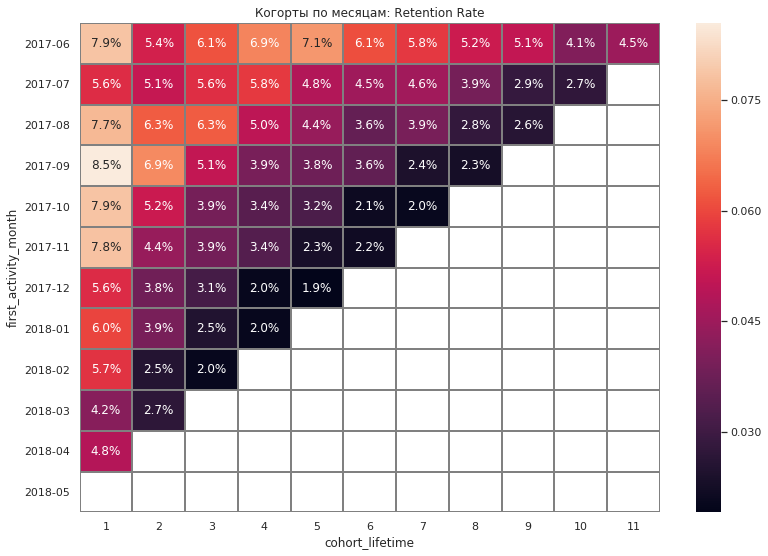

In [40]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когорты по месяцам: Retention Rate')
sns.heatmap(retention_rate_pivot.loc[:,1:],\
            yticklabels = retention_rate_pivot.index.strftime('%Y-%m'),\
            annot=True, fmt='.1%',linewidths=1, linecolor='gray')

In [41]:
retention_rate_mean_by_cohort = retention_rate_pivot.loc[:,1:].mean(axis=0).reset_index()
retention_rate_mean_by_cohort

,cohort_lifetime,0
0,1,0.07
1,2,0.05
2,3,0.04
3,4,0.04
4,5,0.04
5,6,0.04
6,7,0.04
7,8,0.04
8,9,0.04
9,10,0.03


Количество пользователей, возвращающихся в следующий месяц после нулевого периода составляет в среднем 7%, второй месяц - 5%, следующие 7 месяцев - 4%. Изменения Rеtention rate можно объяснить сезонностью - с апреля по август спад, в ноябре пик активности. На тепловой карте видно, что первая когорта июньская самая стабильная и показывает лучший коэффициент почти во всех месяцах. 

#### Когда люди начинают покупать?

Узнаем через какое время после первого посещения совершается покупка.

In [42]:
first_visits = visits_df.sort_values(by=['uid','start_ts']).groupby('uid').\
agg({'start_ts':'first', 'source_id':'first', 'device':'first', 'first_activity_month':'first'}).\
reset_index()
first_visits

,uid,start_ts,source_id,device,first_activity_month
0,11863502262781,2018-03-01 17:27:00,3,touch,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2,touch,2018-02-01
2,297729379853735,2017-06-07 18:47:00,3,desktop,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2,desktop,2017-09-01
4,325320750514679,2017-09-30 14:29:00,5,desktop,2017-09-01
...,...,...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,5,desktop,2017-11-01
228165,18446424184725333426,2017-12-06 20:32:00,4,touch,2017-12-01
228166,18446556406699109058,2018-01-01 16:29:00,3,touch,2018-01-01
228167,18446621818809592527,2017-12-27 13:27:00,4,desktop,2017-12-01


In [43]:
orders_df

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [44]:
first_orders = orders_df.sort_values(by=['uid','buy_ts']).groupby('uid').agg({'buy_ts':'first'}).reset_index()
# составляем список с первой покупкой

In [45]:
first_purchase = first_visits.merge(first_orders , on='uid', how='left')# объединяем списки в одну таблицу

In [46]:
first_orders_df = orders_df.groupby(['uid'])['buy_ts'].min().reset_index()#
first_orders_df

,uid,buy_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [47]:
first_purchase

,uid,start_ts,source_id,device,first_activity_month,buy_ts
0,11863502262781,2018-03-01 17:27:00,3,touch,2018-03-01,NaT
1,49537067089222,2018-02-06 15:55:00,2,touch,2018-02-01,NaT
2,297729379853735,2017-06-07 18:47:00,3,desktop,2017-06-01,NaT
3,313578113262317,2017-09-18 22:49:00,2,desktop,2017-09-01,2018-01-03 21:51:00
4,325320750514679,2017-09-30 14:29:00,5,desktop,2017-09-01,NaT
...,...,...,...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,5,desktop,2017-11-01,NaT
228165,18446424184725333426,2017-12-06 20:32:00,4,touch,2017-12-01,NaT
228166,18446556406699109058,2018-01-01 16:29:00,3,touch,2018-01-01,NaT
228167,18446621818809592527,2017-12-27 13:27:00,4,desktop,2017-12-01,NaT


In [48]:
first_purchase = first_purchase[~first_purchase['buy_ts'].isna()]# удаляем в столбце buy_ts все пропучщенные строки
first_purchase

,uid,start_ts,source_id,device,first_activity_month,buy_ts
3,313578113262317,2017-09-18 22:49:00,2,desktop,2017-09-01,2018-01-03 21:51:00
22,1575281904278712,2017-06-03 10:13:00,10,touch,2017-06-01,2017-06-03 10:13:00
35,2429014661409475,2017-10-11 17:14:00,3,desktop,2017-10-01,2017-10-11 18:33:00
36,2464366381792757,2018-01-27 20:10:00,5,desktop,2018-01-01,2018-01-28 15:54:00
38,2551852515556206,2017-11-24 10:14:00,5,desktop,2017-11-01,2017-11-24 10:14:00
...,...,...,...,...,...,...
228142,18445147675727495770,2017-08-20 13:30:00,5,touch,2017-08-01,2017-11-24 09:03:00
228143,18445407535914413204,2017-09-22 23:48:00,3,desktop,2017-09-01,2017-09-22 23:55:00
228148,18445601152732270159,2017-08-07 11:51:00,2,desktop,2017-08-01,2018-03-26 22:54:00
228161,18446156210226471712,2017-11-07 10:01:00,3,desktop,2017-11-01,2018-02-18 19:34:00


In [49]:
first_purchase['delta']= (first_purchase['buy_ts'] - first_purchase['start_ts']).dt.total_seconds()/60/60
# добавляем столбец delta, в котором будет указано время в часах, между первым посещением и покупкой

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
first_purchase.head()

,uid,start_ts,source_id,device,first_activity_month,buy_ts,delta
3,313578113262317,2017-09-18 22:49:00,2,desktop,2017-09-01,2018-01-03 21:51:00,2567.03
22,1575281904278712,2017-06-03 10:13:00,10,touch,2017-06-01,2017-06-03 10:13:00,0.00
35,2429014661409475,2017-10-11 17:14:00,3,desktop,2017-10-01,2017-10-11 18:33:00,1.32
36,2464366381792757,2018-01-27 20:10:00,5,desktop,2018-01-01,2018-01-28 15:54:00,19.73
38,2551852515556206,2017-11-24 10:14:00,5,desktop,2017-11-01,2017-11-24 10:14:00,0.00


In [51]:
first_purchase[['delta']].describe().T

,count,mean,std,min,25%,50%,75%,max
delta,36523.00,405.67,1129.75,0.00,0.07,0.27,48.28,8719.07


0,27 часа или 16,2 минуты в среднем проходит между первым посещением и покупкой. 

#### Сколько раз за период покупают?


In [52]:
first_order_date = orders_df.groupby(['uid'])['buy_ts'].min()
first_order_date.name = 'first_order_date'
orders_df = orders_df.join(first_order_date,on='uid')
orders_df

,buy_ts,revenue,uid,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00


In [53]:
orders_df['first_order_month'] = orders_df['first_order_date'].astype('datetime64[M]')

In [54]:
orders_df['order_month'] = orders_df['buy_ts'].astype('datetime64[M]')

In [55]:
orders_df['cohort_lifetime'] = orders_df['order_month'] - orders_df['first_order_month']
orders_df['cohort_lifetime'] = (orders_df['cohort_lifetime']/ np.timedelta64(1,'M')).round().astype('int')
orders_df

,buy_ts,revenue,uid,first_order_date,first_order_month,order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-01,2018-05-01,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-01,2018-05-01,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01,2018-05-01,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,2018-05-01,0


In [56]:
cohorts_month_orders = orders_df.groupby(['first_order_month','cohort_lifetime']).agg({'uid':'nunique'}).round().reset_index()
cohorts_month_orders

,first_order_month,cohort_lifetime,uid
0,2017-06-01,0,2023
1,2017-06-01,1,61
2,2017-06-01,2,50
3,2017-06-01,3,54
4,2017-06-01,4,88
...,...,...,...
74,2018-03-01,2,58
75,2018-04-01,0,2276
76,2018-04-01,1,69
77,2018-05-01,0,2988


In [57]:
initial_buyers_count = cohorts_month_orders[cohorts_month_orders['cohort_lifetime'] == 0][['first_order_month','uid']]
initial_buyers_count.columns = ['first_order_month','cohort_buyers']
initial_buyers_count

,first_order_month,cohort_buyers
0,2017-06-01,2023
12,2017-07-01,1923
23,2017-08-01,1370
33,2017-09-01,2581
42,2017-10-01,4340
50,2017-11-01,4081
57,2017-12-01,4383
63,2018-01-01,3373
68,2018-02-01,3651
72,2018-03-01,3533


In [58]:
cohorts_month_orders = cohorts_month_orders.merge(initial_buyers_count, on='first_order_month')
cohorts_month_orders

,first_order_month,cohort_lifetime,uid,cohort_buyers
0,2017-06-01,0,2023,2023
1,2017-06-01,1,61,2023
2,2017-06-01,2,50,2023
3,2017-06-01,3,54,2023
4,2017-06-01,4,88,2023
...,...,...,...,...
74,2018-03-01,2,58,3533
75,2018-04-01,0,2276,2276
76,2018-04-01,1,69,2276
77,2018-05-01,0,2988,2988


In [59]:
cohorts_month_orders['count_purchase_by_month']=cohorts_month_orders['uid']/cohorts_month_orders['cohort_buyers']
cohorts_month_orders

,first_order_month,cohort_lifetime,uid,cohort_buyers,count_purchase_by_month
0,2017-06-01,0,2023,2023,1.00
1,2017-06-01,1,61,2023,0.03
2,2017-06-01,2,50,2023,0.02
3,2017-06-01,3,54,2023,0.03
4,2017-06-01,4,88,2023,0.04
...,...,...,...,...,...
74,2018-03-01,2,58,3533,0.02
75,2018-04-01,0,2276,2276,1.00
76,2018-04-01,1,69,2276,0.03
77,2018-05-01,0,2988,2988,1.00


In [60]:
cohorts_month_orders_pivot = cohorts_month_orders.pivot_table(index='first_order_month',
                                                              columns='cohort_lifetime',
                                                              values='count_purchase_by_month',
                                                              aggfunc='mean')
cohorts_month_orders_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.00,0.03,0.02,0.03,0.04,0.03,0.03,0.02,0.03,0.02,0.02,0.03
2017-07-01,1.00,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.01,0.01,nan
2017-08-01,1.00,0.04,0.04,0.03,0.03,0.02,0.02,0.03,0.01,0.02,nan,nan
2017-09-01,1.00,0.05,0.04,0.03,0.02,0.02,0.03,0.01,0.02,nan,nan,nan
2017-10-01,1.00,0.05,0.03,0.02,0.02,0.02,0.01,0.02,nan,nan,nan,nan
2017-11-01,1.00,0.05,0.03,0.03,0.02,0.01,0.02,nan,nan,nan,nan,nan
2017-12-01,1.00,0.03,0.02,0.02,0.01,0.01,nan,nan,nan,nan,nan,nan
2018-01-01,1.00,0.03,0.02,0.01,0.01,nan,nan,nan,nan,nan,nan,nan
2018-02-01,1.00,0.03,0.02,0.01,nan,nan,nan,nan,nan,nan,nan,nan


Возьмем в расчет когорты, которые существуют 6 месяцев от начала, т.е оставляем все когорты начиная с 2017-12

In [61]:
cohorts_month_orders.drop(cohorts_month_orders[cohorts_month_orders['first_order_month'] > '2017-12-01'].index, inplace=True)
cohorts_month_orders.drop(cohorts_month_orders[cohorts_month_orders['cohort_lifetime'] > 5].index, inplace=True)

In [62]:
cohorts_6_month_orders_pivot = cohorts_month_orders.pivot_table(index='first_order_month',\
                                                                columns='cohort_lifetime',
                                                                values='count_purchase_by_month',
                                                                aggfunc='sum')
cohorts_6_month_orders_pivot

cohort_lifetime,0,1,2,3,4,5
first_order_month,,,,,,
2017-06-01,1.00,0.03,0.02,0.03,0.04,0.03
2017-07-01,1.00,0.03,0.03,0.03,0.03,0.02
2017-08-01,1.00,0.04,0.04,0.03,0.03,0.02
2017-09-01,1.00,0.05,0.04,0.03,0.02,0.02
2017-10-01,1.00,0.05,0.03,0.02,0.02,0.02
2017-11-01,1.00,0.05,0.03,0.03,0.02,0.01
2017-12-01,1.00,0.03,0.02,0.02,0.01,0.01


In [63]:
cohorts_6_month_orders_pivot=cohorts_6_month_orders_pivot.cumsum(axis=1).mean(axis=0)[5]
cohorts_6_month_orders_pivot

1.1432771617579578

1.15 покупок совершает 1 покупатель за первых 6 месяцев. 

#### Какой средний чек?


In [64]:
avg_check = orders_df['revenue'].mean()# средний чек за весь период
avg_check

4.999646930477041

5 USD средний чек за весь период.

Построим график среднего чека по неделям

In [65]:
orders_df['week'] = orders_df['buy_ts'].astype('datetime64[W]')# добавляем столбец неделя

In [66]:
orders_df

,buy_ts,revenue,uid,first_order_date,first_order_month,order_month,cohort_lifetime,week
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0,2017-06-01
...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-01,2018-05-01,0,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-01,2018-05-01,0,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01,2018-05-01,0,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,2018-05-01,0,2018-05-31


In [67]:
avg_check_week = orders_df.sort_values(by=['week','uid']).groupby('week').agg({'revenue':'mean'}) # средний чек по неделям
avg_check_week = avg_check_week.rename(columns={'week': 'week', 'revenue': 'avg_check_week'})
avg_check_week.head(5)


,avg_check_week
week,
2017-06-01,2.84
2017-06-08,4.83
2017-06-15,4.48
2017-06-22,4.76
2017-06-29,5.31


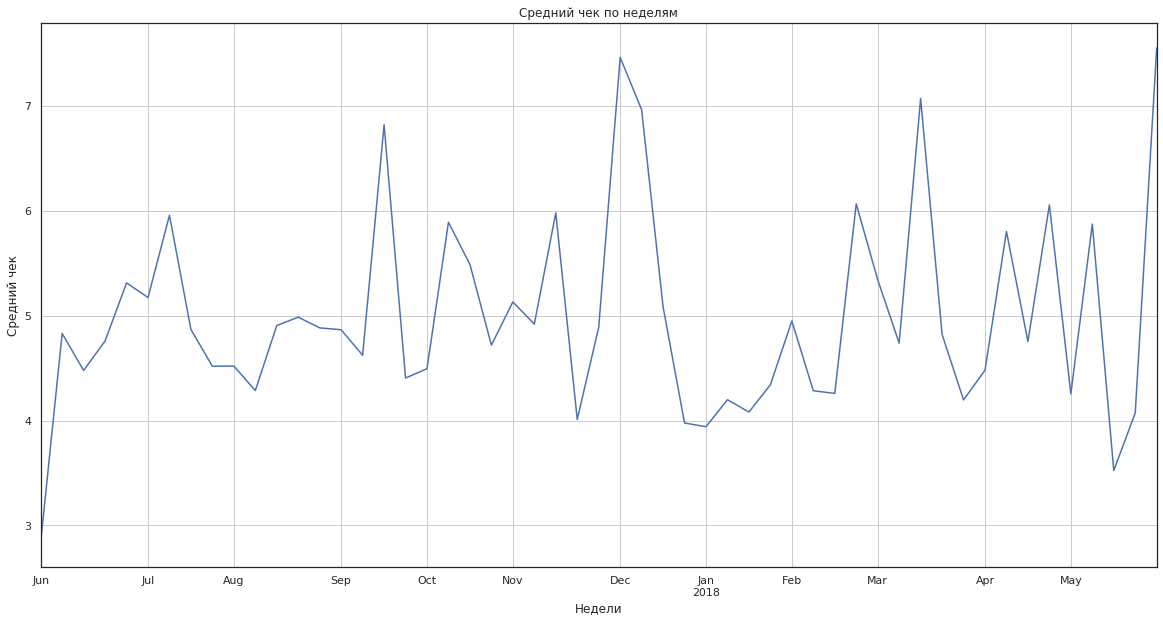

In [68]:
avg_check_week['avg_check_week'].plot(figsize = (20,10), grid=True)
plt.title('Средний чек по неделям')
plt.xlabel('Недели')
plt.ylabel('Средний чек')
plt.show()

Средний чек за весь период составляет 5 USD. Минимальный средний чек 4 USD. Максимальный - 9 USD. Почти в каждом месяце случаются недели со средним чеком близким к 5 USD  и менее. Каждые 3 месяца случаются пики. Самые стабильно плохие показатели в январе.

#### Сколько денег приносят? (LTV)

In [69]:
orders_df.head(5)

,buy_ts,revenue,uid,first_order_date,first_order_month,order_month,cohort_lifetime,week
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0,2017-06-01


In [70]:
first_orders = orders_df.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [71]:
initial_buyers_count

,first_order_month,cohort_buyers
0,2017-06-01,2023
12,2017-07-01,1923
23,2017-08-01,1370
33,2017-09-01,2581
42,2017-10-01,4340
50,2017-11-01,4081
57,2017-12-01,4383
63,2018-01-01,3373
68,2018-02-01,3651
72,2018-03-01,3533


In [72]:
margin_rate = 1 # маржинальность будет равна 100 %, т.к. в проекте нет данных для расчета.

In [73]:
cohorts = orders_df.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()# сгруппируйте зазазы в когорты

In [74]:
cohorts

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [75]:
report = pd.merge(initial_buyers_count, cohorts, on='first_order_month')
report

,first_order_month,cohort_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87
75,2018-04-01,2276,2018-04-01,10600.69
76,2018-04-01,2276,2018-05-01,1209.92
77,2018-05-01,2988,2018-05-01,13925.76


In [76]:
report['gp'] = report['revenue'] * margin_rate

In [77]:
report['age'] = ((report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int')

In [78]:
report['ltv'] = report['gp'] / report['cohort_buyers']# вычисляем LTV когорт

In [79]:
# оставляем когорты, которые прожили 6 месяцев от начала
report.drop(report[report['first_order_month'] > '2017-12-01'].index, inplace=True)
report.drop(report[report['age'] > 5].index, inplace=True)
report.head(5)

,first_order_month,cohort_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.72
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.49
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.44
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.95
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.02


In [80]:
result = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)
result

age,0,1,2,3,4,5
first_order_month,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28
2017-09-01,5.64,1.12,0.52,3.98,0.40,0.65
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12
2017-11-01,5.15,0.40,0.20,0.32,0.15,0.05
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34


In [81]:
m6_cum_ltv_cohorts=result.cumsum(axis=1)# по когортам за первые 6 месяцев
m6_cum_ltv_cohorts

age,0,1,2,3,4,5
first_order_month,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.37
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27
2017-12-01,4.74,5.00,5.93,7.00,7.31,7.65


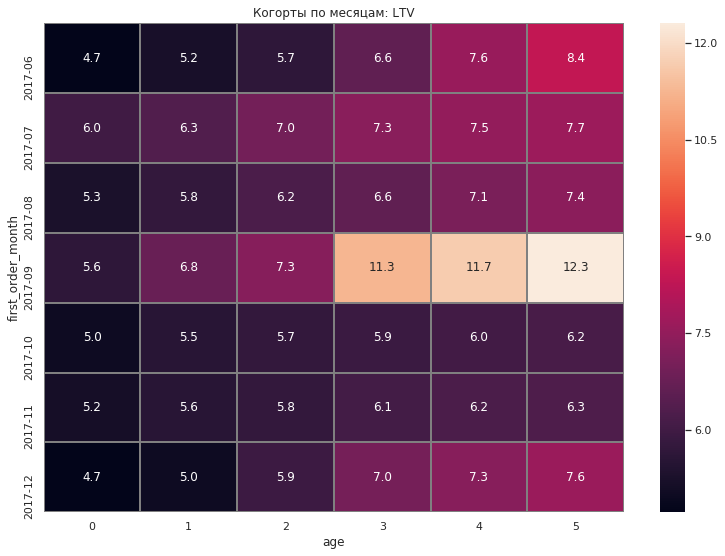

In [82]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когорты по месяцам: LTV')
sns.heatmap(m6_cum_ltv_cohorts,\
            yticklabels = m6_cum_ltv_cohorts.index.strftime('%Y-%m'),\
            annot=True, fmt='.1f',linewidths=1, linecolor='gray')

In [83]:
m6_cum_ltv = result.cumsum(axis=1).mean(axis=0)[5]
m6_cum_ltv

7.970000000000001

8USD приносит 1 покупатель за первых 6 месяцев. Самый большой LTV за первые 6 месяцев у сентябрьской когорты 12,3USD 

In [84]:
costs_df = costs_df.rename(columns={'dt':'acquisition_date'})

In [85]:
# построим профиль пользователей с указанием источника и устройства, с которого пользователь пришел первый раз
users = (visits_df.sort_values(by=['uid','start_ts']).groupby('uid')
         .agg({'start_ts':'first', 'source_id':'first', 'device': 'first'})
         .rename(columns = {'start_ts': 'acquisition_ts'}))
users

,acquisition_ts,source_id,device
uid,,,
11863502262781,2018-03-01 17:27:00,3,touch
49537067089222,2018-02-06 15:55:00,2,touch
297729379853735,2017-06-07 18:47:00,3,desktop
313578113262317,2017-09-18 22:49:00,2,desktop
325320750514679,2017-09-30 14:29:00,5,desktop
...,...,...,...
18446403737806311543,2017-11-30 03:36:00,5,desktop
18446424184725333426,2017-12-06 20:32:00,4,touch
18446556406699109058,2018-01-01 16:29:00,3,touch


In [86]:
users['acquisition_date'] = users['acquisition_ts'].dt.date
users['acquisition_month'] = users['acquisition_ts'].astype('datetime64[M]')
users = (users.reset_index().set_index(['source_id', 'acquisition_date'])
         .join(costs_df.set_index(['source_id', 'acquisition_date']), how='left'))
users

uid      acquisition_ts   device  \
source_id acquisition_date                                                      
1         2017-06-01          469568501030474895 2017-06-01 05:30:00  desktop   
          2017-06-01          618675438905551322 2017-06-01 02:37:00    touch   
          2017-06-01         1074355127080856382 2017-06-01 09:21:00  desktop   
          2017-06-01         1292867924428534308 2017-06-01 12:53:00  desktop   
          2017-06-01         1548840741623289234 2017-06-01 01:18:00  desktop   
...                                          ...                 ...      ...   
10        2018-05-31        17550479715346067160 2018-05-31 22:00:00    touch   
          2018-05-31        17715613363403416471 2018-05-31 03:30:00  desktop   
          2018-05-31        18076428844159112818 2018-05-31 17:47:00    touch   
          2018-05-31        18238279803055794091 2018-05-31 15:52:00    touch   
          2018-05-31        18428797902626915731 2018-05-31 22:10:00  desktop   

                           acquisition_month  costs  
source_id acquisition_date                           
1         2017-06-01              2017-06-01  75.20  
          2017-06-01              2017-06-01  75.20  
          2017-06-01              2017-06-01  75.20  
          2017-06-01              2017-06-01  75.20  
          2017-06-01              2017-06-01  75.20  
...                                      ...    ...  
10        2018-05-31              2018-05-01  17.60  
          2018-05-31              2018-05-01  17.60  
          2018-05-31              2018-05-01  17.60  
          2018-05-31              2018-05-01  17.60  
          2018-05-31              2018-05-01  17.60  

[228169 rows x 5 columns]

In [87]:
    # добавляем стоимость приобретения нового пользователя
user_cost = (users.groupby(['source_id', 'acquisition_date']).agg({'device': 'count', 'costs': 'max'})
            .rename(columns={'device': 'users'}))
user_cost['acquisition_cost'] = user_cost['costs'] / user_cost['users']
user_cost

users  costs  acquisition_cost
source_id acquisition_date                                
1         2017-06-01           47  75.20              1.60
          2017-06-02           27  62.25              2.31
          2017-06-03           22  36.53              1.66
          2017-06-04           23  55.00              2.39
          2017-06-05           39  57.08              1.46
...                           ...    ...               ...
10        2018-05-27            5   9.92              1.98
          2018-05-28           34  21.26              0.63
          2018-05-29           23  11.32              0.49
          2018-05-30           54  33.15              0.61
          2018-05-31           99  17.60              0.18

[2568 rows x 3 columns]

In [88]:
    # добавляем стоимость к профилю пользователей
users = users.join(user_cost[['acquisition_cost']], how='left')
users

uid      acquisition_ts   device  \
source_id acquisition_date                                                      
1         2017-06-01          469568501030474895 2017-06-01 05:30:00  desktop   
          2017-06-01          618675438905551322 2017-06-01 02:37:00    touch   
          2017-06-01         1074355127080856382 2017-06-01 09:21:00  desktop   
          2017-06-01         1292867924428534308 2017-06-01 12:53:00  desktop   
          2017-06-01         1548840741623289234 2017-06-01 01:18:00  desktop   
...                                          ...                 ...      ...   
10        2018-05-31        17550479715346067160 2018-05-31 22:00:00    touch   
          2018-05-31        17715613363403416471 2018-05-31 03:30:00  desktop   
          2018-05-31        18076428844159112818 2018-05-31 17:47:00    touch   
          2018-05-31        18238279803055794091 2018-05-31 15:52:00    touch   
          2018-05-31        18428797902626915731 2018-05-31 22:10:00  desktop   

                           acquisition_month  costs  acquisition_cost  
source_id acquisition_date                                             
1         2017-06-01              2017-06-01  75.20              1.60  
          2017-06-01              2017-06-01  75.20              1.60  
          2017-06-01              2017-06-01  75.20              1.60  
          2017-06-01              2017-06-01  75.20              1.60  
          2017-06-01              2017-06-01  75.20              1.60  
...                                      ...    ...               ...  
10        2018-05-31              2018-05-01  17.60              0.18  
          2018-05-31              2018-05-01  17.60              0.18  
          2018-05-31              2018-05-01  17.60              0.18  
          2018-05-31              2018-05-01  17.60              0.18  
          2018-05-31              2018-05-01  17.60              0.18  

[228169 rows x 6 columns]

In [89]:
users = users.reset_index().set_index('uid')[['acquisition_ts','acquisition_date','acquisition_month',
                                             'source_id','device', 'acquisition_cost']]
users

,acquisition_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost
uid,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.60
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.60
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.60
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.60
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.60
...,...,...,...,...,...,...
17550479715346067160,2018-05-31 22:00:00,2018-05-31,2018-05-01,10,touch,0.18
17715613363403416471,2018-05-31 03:30:00,2018-05-31,2018-05-01,10,desktop,0.18
18076428844159112818,2018-05-31 17:47:00,2018-05-31,2018-05-01,10,touch,0.18


LTV по  устройствам

In [90]:
dimensions = ['device']

In [91]:
    # собираем когорты
cohorts_device = (users.groupby(dimensions)
            .agg({'source_id': 'count','acquisition_cost':'sum'})
            .rename(columns = {'source_id': 'cohort_size'}))
cohorts_device 

,cohort_size,acquisition_cost
device,,
desktop,160795,235065.75
touch,67374,94000.73


In [92]:
ltv_device = orders_df.set_index('uid').join(users, how='left')[['acquisition_month','source_id', 'device',
                                                         'order_month','revenue']]
ltv_device['age_month'] = ((ltv_device['order_month'] - ltv_device['acquisition_month']) / np.timedelta64(1,'M')).round().astype('int')
ltv_device = ltv_device.groupby(dimensions + ['age_month']).agg({'revenue': 'sum'})
ltv_device = pd.pivot_table(ltv_device, index = dimensions, columns = 'age_month', values = 'revenue', aggfunc = 'sum')
ltv_device = ltv_device.cumsum(axis = 1)
ltv_device = cohorts_device[['cohort_size']].join(ltv_device)
ltv_device = ltv_device.div(ltv_device['cohort_size'], axis = 0).drop(columns = ['cohort_size'])
ltv_device 

,0,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,,
desktop,0.73,0.84,0.92,1.07,1.13,1.18,1.22,1.25,1.27,1.29,1.30,1.31
touch,0.37,0.45,0.48,0.50,0.52,0.54,0.55,0.57,0.58,0.60,0.60,0.60


LTV за 12 первых месяцев для desktop 13.52 USD, а - touch 6.37 USD 

LTV по источникам

In [93]:
dimensions = ['source_id']

In [94]:
# собираем когорты
cohorts_source = (users.groupby(dimensions)
            .agg({'device': 'count','acquisition_cost':'sum'})
            .rename(columns = {'device': 'cohort_size'}))
cohorts_source 

,cohort_size,acquisition_cost
source_id,,
1,9469,20833.27
2,17616,42806.04
3,66116,141321.63
4,72346,61073.60
5,49237,51756.40
6,2,0.00
7,32,0.00
9,6448,5454.42
10,6903,5821.12


In [95]:
ltv_source = orders_df.set_index('uid').join(users, how='left')[['acquisition_month','source_id', 'device',
                                                         'order_month','revenue']]
ltv_source

,acquisition_month,source_id,device,order_month,revenue
uid,,,,,
9223707061355654945,2017-10-01,9,touch,2017-10-01,4.64
9224005701666002943,2017-12-01,5,desktop,2017-12-01,3.36
9224005701666002943,2017-12-01,5,desktop,2018-03-01,3.67
9225406053864431006,2017-09-01,4,desktop,2017-12-01,0.43
9225479525411867039,2018-02-01,4,touch,2018-02-01,7.33
...,...,...,...,...,...
9221059331469344216,2017-12-01,4,desktop,2017-12-01,0.98
9221809908447127809,2017-12-01,4,desktop,2017-12-01,1.34
9222179515197516675,2018-02-01,1,desktop,2018-02-01,2.20


In [96]:
ltv_source['age_month'] = ((ltv_source['order_month'] - ltv_source['acquisition_month']) / np.timedelta64(1,'M')).round().astype('int')
ltv_source = ltv_source.groupby(dimensions + ['age_month']).agg({'revenue': 'sum'})

ltv_source = pd.pivot_table(ltv_source, index = dimensions, columns = 'age_month', values = 'revenue', aggfunc = 'sum')
ltv_source = ltv_source.cumsum(axis = 1)
ltv_source = cohorts_source[['cohort_size']].join(ltv_source)
ltv_source = ltv_source.div(ltv_source['cohort_size'], axis = 0).drop(columns = ['cohort_size'])
ltv_source 

,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,1.53,1.81,2.00,2.29,2.47,2.59,2.68,2.92,3.05,3.14,3.23,3.28
2,1.02,1.36,1.70,2.07,2.25,2.39,2.46,2.51,2.55,2.60,2.64,2.66
3,0.57,0.66,0.70,0.73,0.76,0.78,0.80,0.81,0.81,0.82,0.82,0.82
4,0.52,0.58,0.61,0.64,0.66,0.69,0.72,0.73,0.74,0.76,0.77,0.78
5,0.58,0.65,0.70,0.92,0.95,1.00,1.02,1.04,1.05,1.06,1.07,1.07
6,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,0.04,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,0.37,0.47,0.55,0.63,0.70,0.74,0.78,0.81,0.86,0.88,0.89,0.89
10,0.51,0.56,0.58,0.59,0.61,0.62,0.64,0.64,0.64,0.64,0.64,0.64


Самый высокий ltv у 1 источника - 3,28 USD. 6 и 7 источники не использовали. 

#### Сколько денег потратили? Всего / на каждый источник / по времени

In [97]:
costs_df['acquisition_date'] = pd.to_datetime(costs_df['acquisition_date'])
costs_df['month'] = costs_df['acquisition_date'].astype('datetime64[M]')# добавляем столбец месяц 
costs_df

,source_id,acquisition_date,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [98]:
costs_df['costs'].sum() #считаем общие расходы на рекламу

329131.62

In [99]:
orders_df['revenue'].sum() #считаем общую выручку

252057.19999999998

329131USD потратили на рекламу за весь период. Расходы на рекламу в 1,5 раза превышают выручку!

In [100]:
costs_df.groupby(['source_id']).agg({'costs': 'sum'})

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


3 источник абсолютный лидер по объему. На него потратили 141 321USD

In [101]:
costs_by_sources = costs_df.groupby(['source_id', 'month']).agg({'costs': 'sum'}).reset_index()
costs_by_sources_pivot= costs_by_sources.pivot_table(index = 'month',
                                   values = 'costs',
                                   columns = 'source_id',
                                   aggfunc = 'sum')
costs_by_sources_pivot

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


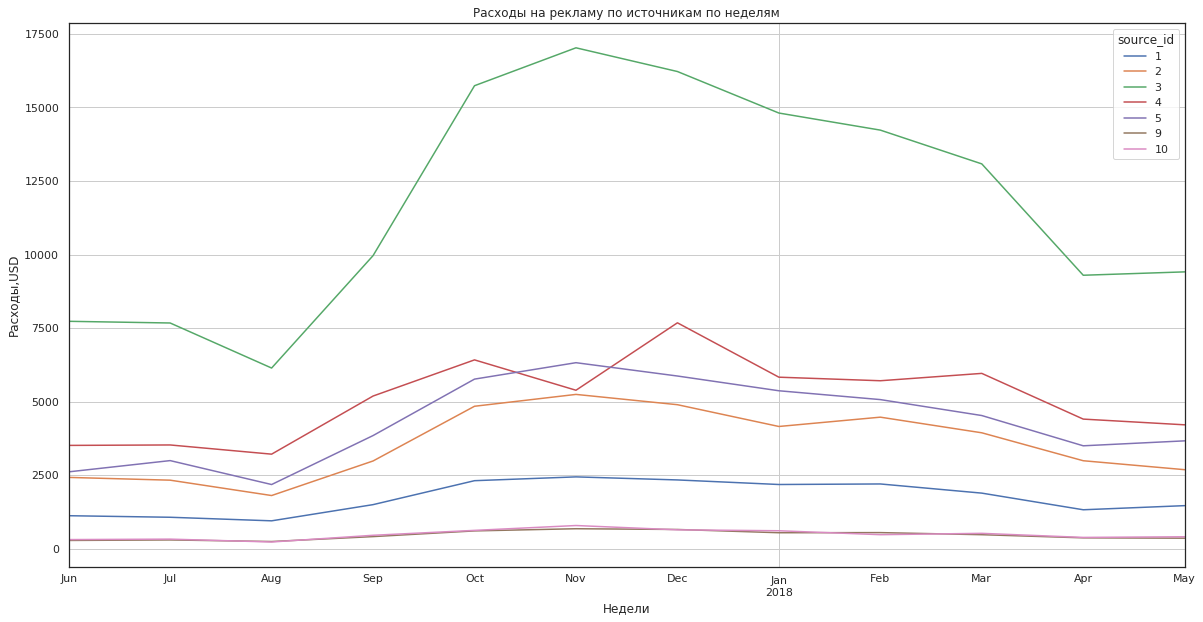

In [102]:
costs_by_sources_pivot.plot(figsize = (20,10), grid=True)
plt.title('Расходы на рекламу по источникам по неделям')
plt.xlabel('Недели')
plt.ylabel('Расходы,USD')
plt.show()

Расходы на рекламу растут к ноябрю, декабрю.

#### Сколько стоило привлечение одного покупателя из каждого источника?

In [103]:
users = users.reset_index()
user_source_cost = users[users['uid'].isin(orders_df['uid'].unique())].groupby('source_id').agg({'uid':'nunique'})
user_source_cost = user_source_cost.merge(costs_df.groupby('source_id').sum(), on = 'source_id')
user_source_cost

,uid,costs
source_id,,
1,2899,20833.27
2,3506,42806.04
3,10473,141321.63
4,10296,61073.60
5,6931,51757.10
9,1088,5517.49
10,1329,5822.49


In [104]:
user_source_cost['mean_cost'] = (user_source_cost['costs'] / user_source_cost['uid'])
user_source_cost.sort_values('mean_cost',ascending=False).reset_index()

,source_id,uid,costs,mean_cost
0,3,10473,141321.63,13.49
1,2,3506,42806.04,12.21
2,5,6931,51757.10,7.47
3,1,2899,20833.27,7.19
4,4,10296,61073.60,5.93
5,9,1088,5517.49,5.07
6,10,1329,5822.49,4.38


Самые дорогие покупатели пришли из 3 источника.

#### На сколько окупились расходы? (ROMI)

ROMI по источникам

In [105]:
cohorts_source['cac'] = cohorts_source['acquisition_cost'] / cohorts_source['cohort_size']
cohorts_source

,cohort_size,acquisition_cost,cac
source_id,,,
1,9469,20833.27,2.20
2,17616,42806.04,2.43
3,66116,141321.63,2.14
4,72346,61073.60,0.84
5,49237,51756.40,1.05
6,2,0.00,0.00
7,32,0.00,0.00
9,6448,5454.42,0.85
10,6903,5821.12,0.84


In [106]:
ltv_source_cac = ltv_source.join(cohorts_source).drop(columns=['cohort_size','acquisition_cost']).drop(index=[7])
ltv_source_cac

,0,1,2,3,4,5,6,7,8,9,10,11,cac
source_id,,,,,,,,,,,,,
1,1.53,1.81,2.00,2.29,2.47,2.59,2.68,2.92,3.05,3.14,3.23,3.28,2.20
2,1.02,1.36,1.70,2.07,2.25,2.39,2.46,2.51,2.55,2.60,2.64,2.66,2.43
3,0.57,0.66,0.70,0.73,0.76,0.78,0.80,0.81,0.81,0.82,0.82,0.82,2.14
4,0.52,0.58,0.61,0.64,0.66,0.69,0.72,0.73,0.74,0.76,0.77,0.78,0.84
5,0.58,0.65,0.70,0.92,0.95,1.00,1.02,1.04,1.05,1.06,1.07,1.07,1.05
6,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00
9,0.37,0.47,0.55,0.63,0.70,0.74,0.78,0.81,0.86,0.88,0.89,0.89,0.85
10,0.51,0.56,0.58,0.59,0.61,0.62,0.64,0.64,0.64,0.64,0.64,0.64,0.84


In [107]:
romi_source = ltv_source_cac.div(ltv_source_cac['cac'], axis=0).drop(columns=['cac']).drop(index=[6])
romi_source

,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,0.70,0.82,0.91,1.04,1.12,1.17,1.22,1.33,1.39,1.43,1.47,1.49
2,0.42,0.56,0.70,0.85,0.93,0.99,1.01,1.03,1.05,1.07,1.09,1.10
3,0.27,0.31,0.33,0.34,0.36,0.37,0.37,0.38,0.38,0.38,0.38,0.39
4,0.61,0.69,0.72,0.76,0.78,0.82,0.85,0.86,0.88,0.90,0.92,0.93
5,0.56,0.62,0.66,0.87,0.91,0.95,0.97,0.99,1.00,1.01,1.02,1.02
9,0.44,0.55,0.66,0.75,0.83,0.87,0.93,0.96,1.01,1.04,1.05,1.06
10,0.61,0.66,0.68,0.70,0.73,0.74,0.75,0.76,0.76,0.76,0.76,0.76


Самый высокий ROMI 1,49 у 1 источника, он окупается на 4 месяц. 3,4 и 10 источники не окупаются.

ROMI по устройствам

In [108]:
cohorts_device['cac'] = cohorts_device['acquisition_cost'] / cohorts_device['cohort_size']
cohorts_device

,cohort_size,acquisition_cost,cac
device,,,
desktop,160795,235065.75,1.46
touch,67374,94000.73,1.40


In [109]:
ltv_device_cac = ltv_device.join(cohorts_device).drop(columns=['cohort_size','acquisition_cost'])
ltv_device_cac

,0,1,2,3,4,5,6,7,8,9,10,11,cac
device,,,,,,,,,,,,,
desktop,0.73,0.84,0.92,1.07,1.13,1.18,1.22,1.25,1.27,1.29,1.30,1.31,1.46
touch,0.37,0.45,0.48,0.50,0.52,0.54,0.55,0.57,0.58,0.60,0.60,0.60,1.40


In [110]:
romi_device = ltv_device_cac.div(ltv_device_cac['cac'], axis=0).drop(columns=['cac'])
romi_device

,0,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,,
desktop,0.50,0.58,0.63,0.73,0.77,0.81,0.83,0.85,0.87,0.88,0.89,0.90
touch,0.27,0.32,0.34,0.36,0.37,0.39,0.40,0.41,0.42,0.43,0.43,0.43


Реклама ни на одном устройстве не окупается. Наиболее близок к окупаемости ROMI desktop(0,9), он выше, чем у touch(0,43) более чем в 2 раза.

In [111]:
dimensions = ['acquisition_month']
cohorts_ltv_6m = (users.groupby(dimensions)
            .agg({'device': 'count','acquisition_cost':'sum'})
            .rename(columns = {'device': 'cohort_size'}))
cohorts_ltv_6m['cac'] = cohorts_ltv_6m['acquisition_cost'] / cohorts_ltv_6m['cohort_size']
cohorts_ltv_6m

,cohort_size,acquisition_cost,cac
acquisition_month,,,
2017-06-01,13259,18015.00,1.36
2017-07-01,13140,18230.81,1.39
2017-08-01,10181,14789.17,1.45
2017-09-01,16704,24360.36,1.46
2017-10-01,25977,36322.88,1.40
2017-11-01,27248,37907.88,1.39
2017-12-01,25268,38306.03,1.52
2018-01-01,22624,33518.52,1.48
2018-02-01,22197,32707.71,1.47


In [112]:
romi_6m_cac = m6_cum_ltv_cohorts.join(cohorts_ltv_6m).drop(columns=['cohort_size', 'acquisition_cost'])
romi_6m_cac  

,0,1,2,3,4,5,cac
first_order_month,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,1.36
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,1.39
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.37,1.45
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,1.46
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,1.40
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,1.39
2017-12-01,4.74,5.00,5.93,7.00,7.31,7.65,1.52


In [113]:
m6_cum_ltv_cohorts

age,0,1,2,3,4,5
first_order_month,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.37
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27
2017-12-01,4.74,5.00,5.93,7.00,7.31,7.65


In [114]:
romi_6m = romi_6m_cac.div(romi_6m_cac['cac'], axis=0).drop(columns=['cac'])
romi_6m

,0,1,2,3,4,5
first_order_month,,,,,,
2017-06-01,3.47,3.83,4.16,4.86,5.61,6.15
2017-07-01,4.33,4.58,5.02,5.28,5.41,5.53
2017-08-01,3.63,3.96,4.28,4.54,4.88,5.07
2017-09-01,3.87,4.64,4.99,7.72,8.00,8.44
2017-10-01,3.58,3.96,4.10,4.21,4.32,4.41
2017-11-01,3.70,3.99,4.13,4.36,4.47,4.51
2017-12-01,3.13,3.30,3.91,4.62,4.82,5.05


In [115]:
romi_6m.mean()[5]

5.593463293750299

ROMI за 6 месяцев 5,5 !!!

### Вывод
Сервисом Яндекс.Афиша пользуются в среднем: в день - 908 пользователей, в неделю - 5716 пользователей, в месяц - 23228 пользователей. 
Прослеживается сезонность - с сентября начинается рост с пиком в ноябре, а летом количество пользователей минимально.
Среднее количество сессий в день на одного пользователя: 1.08. Если пользователь заходит на сервис, то одного раза ему достаточно.
Распределение не похоже на нормальное. Самыми частыми значениями являются 0 и 60 секунд. 0 означает, что существует какая-то техническая проблема по загрузке сервиса.
Количество пользователей, возвращающихся в следующий месяц после нулевого периода составляет в среднем 7%, второй месяц - 5%, следующие 7 месяцев - 4%. 
Изменения Rеtention rate можно объяснить сезонностью - с апреля по август спад, в ноябре пик активности. На тепловой карте видно, 
что первая когорта июньская самая стабильная и показывает лучший коэффициент почти во всех месяцах.
0,27 часа или 16,2 минуты в среднем проходит между первым посещением и покупкой.
1.15 покупок совершает 1 покупатель за первых 6 месяцев.
Средний чек за весь период составляет 5 USD. Минимальный средний чек 4 USD. Максимальный - 9 USD. 
Почти в каждом месяце случаются недели со средним чеком близким к 5 USD и менее. Каждые 3 месяца случаются пики. Самые стабильно плохие показатели по среднему чеку в январе.
8USD приносит 1 покупатель за первых 6 месяцев. Самый большой LTV за первые 6 месяцев у сентябрьской когорты 12,3USD
LTV за 12 первых месяцев для desktop 13.52 USD, а - touch 6.37 USD. Выручка с desktop в 2 больше, чем с touch! 
Самый высокий ltv у 1 источника - 3,28 USD. 6 и 7 источники не использовали. 
329 131USD потратили на рекламу за весь период. Расходы на рекламу в 1,5 раза превышают выручку!
3 источник абсолютный лидер по объему расходов на рекламу. На него потратили 141 321USD.
Расходы на рекламу растут к ноябрю, декабрю.
Самые дорогие покупатели пришли из 3 источника, каждый из которых стоил 13,49 USD.
Самый высокий ROMI 1,49 у 1 источника, он окупается на 4 месяц. 3,4 и 10 источники не окупаются.
Анализ рекламы в разрезе устройств показал, что наиболее близок к окупаемости ROMI desktop(0,9), он выше, чем у touch(0,43) более чем в 2 раза.
Общий ROMI за 6 месяцев 5,5 !!!
#### Резюме
Расходы на рекламу в 1,5 раза превышают выручку! Выручка с desktop в 2 больше, чем с touch! Самый высокий ROMI 1,49 у 1 источника.
#### Рекомендации
Сократить расходы на рекламу за счет отказа от 3,4 и 10 источников. Сделать упор на 1 источник для desktop. 